## Simple Box Plot (without numbers)

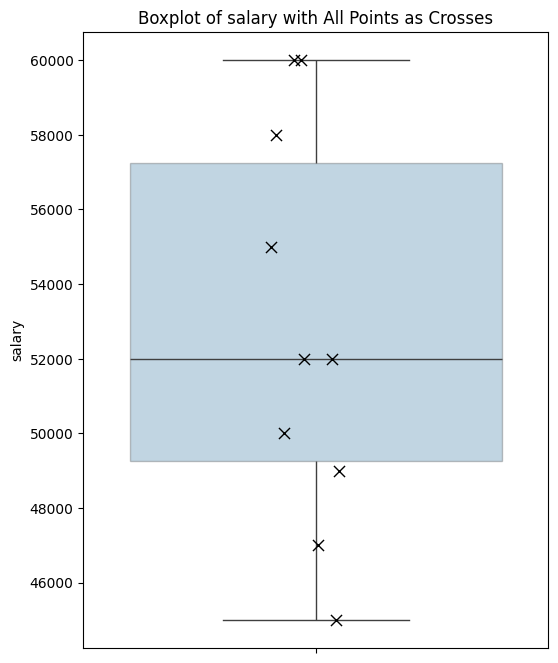

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_boxplot_with_points(df, column):
    """
    Show the boxplot of a variable in a DataFrame and overlay the data points as crosses.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name of the variable to visualize.

    Returns:
    None
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 8))
    
    # Boxplot
    sns.boxplot(y=df[column], showfliers=False, boxprops={'alpha': 0.3})  # Make it vertical with y= instead of x=
    
    # Overlay the data points as crosses
    sns.stripplot(y=df[column], jitter=True, marker='x', color='black', size=8, linewidth=1)
    
    plt.title(f'Boxplot of {column} with All Points as Crosses')
    
    # Display the plot
    plt.show()

# Example usage
import pandas as pd

# Example DataFrame
data = {
    'age': [23, 45, 31, 35, 43, 25, 40, 42, 33, 39],
    'salary': [50000, 60000, 45000, 52000, 58000, 47000, 55000, 60000, 49000, 52000]
}
df = pd.DataFrame(data)

# Show boxplot with all points as crosses for 'salary'
show_boxplot_with_points(df, 'salary')


## Simple Box Plot (with numbers)

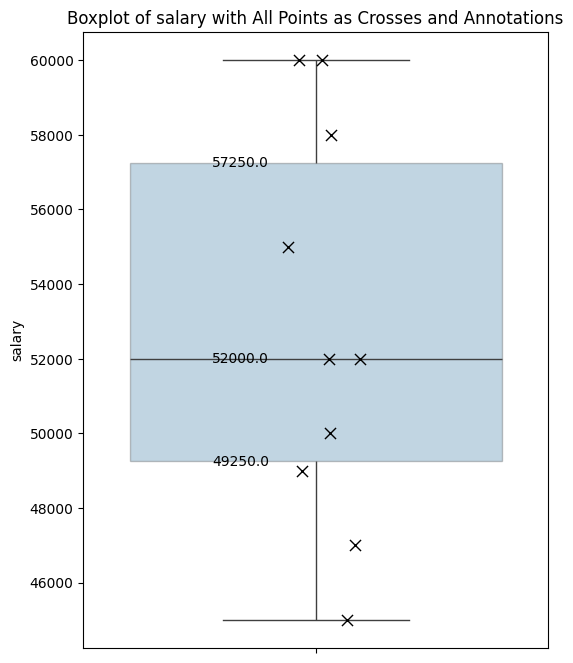

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def show_boxplot_with_points_and_annotations(df, column):
    """
    Show the boxplot of a variable in a DataFrame and overlay the data points as crosses,
    with annotations for the quartile values on the left side of the box.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name of the variable to visualize.

    Returns:
    None
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(6, 8))
    
    # Create the boxplot
    ax = sns.boxplot(y=df[column], showfliers=False, boxprops={'alpha': 0.3})
    
    # Overlay the data points as crosses
    sns.stripplot(y=df[column], jitter=True, marker='x', color='black', size=8, linewidth=1)
    
    # Calculate the quartiles
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    
    # Annotate the boxplot with quartile values on the left side of the box
    for i, q in enumerate(quartiles):
        ax.text(-0.1, q, f'{q:.1f}', ha='right', va='center', color='black', fontsize=10)
    
    # Add title and labels
    plt.title(f'Boxplot of {column} with All Points as Crosses and Annotations')
    plt.xlabel('')
    plt.ylabel(column)
    
    # Display the plot
    plt.show()

# Example usage
data = {
    'age': [23, 45, 31, 35, 43, 25, 40, 42, 33, 39],
    'salary': [50000, 60000, 45000, 52000, 58000, 47000, 55000, 60000, 49000, 52000]
}
df = pd.DataFrame(data)

# Show boxplot with all points as crosses for 'salary'
show_boxplot_with_points_and_annotations(df, 'salary')


## Compare by category (without numbers)

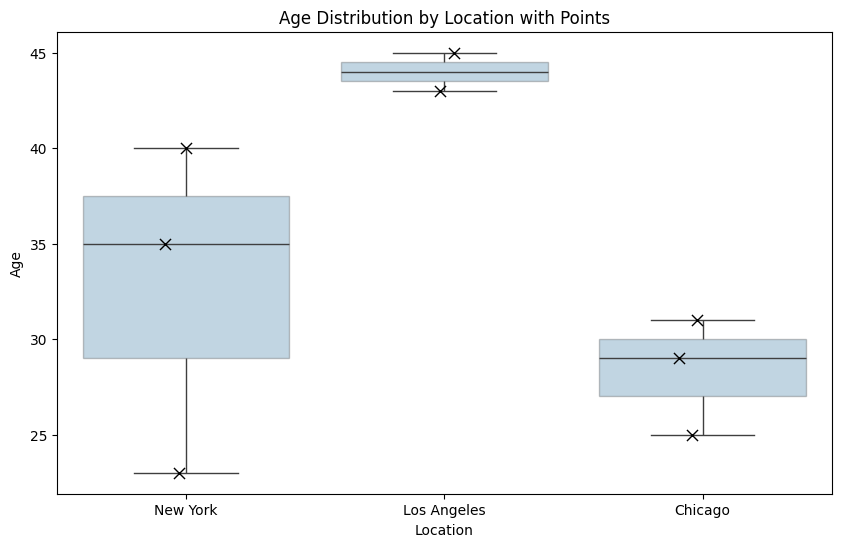

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {
    'location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],
    'age': [23, 45, 31, 35, 43, 25, 40, 29]
}
df = pd.DataFrame(data)

def plot_age_by_location_with_points(df):
    """
    Show a box plot comparing the distribution of age by location with individual points overlaid.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot
    sns.boxplot(x='location', y='age', data=df, showfliers=False, boxprops={'alpha': 0.3})
    
    # Overlay the individual data points
    sns.stripplot(x='location', y='age', data=df, jitter=True, marker='x', color='black', size=8, linewidth=1)
    
    # Adding titles and labels
    plt.title('Age Distribution by Location with Points')
    plt.xlabel('Location')
    plt.ylabel('Age')
    
    # Display the plot
    plt.show()

# Plot the boxplot with points
plot_age_by_location_with_points(df)


## Compare by category (with numbers)

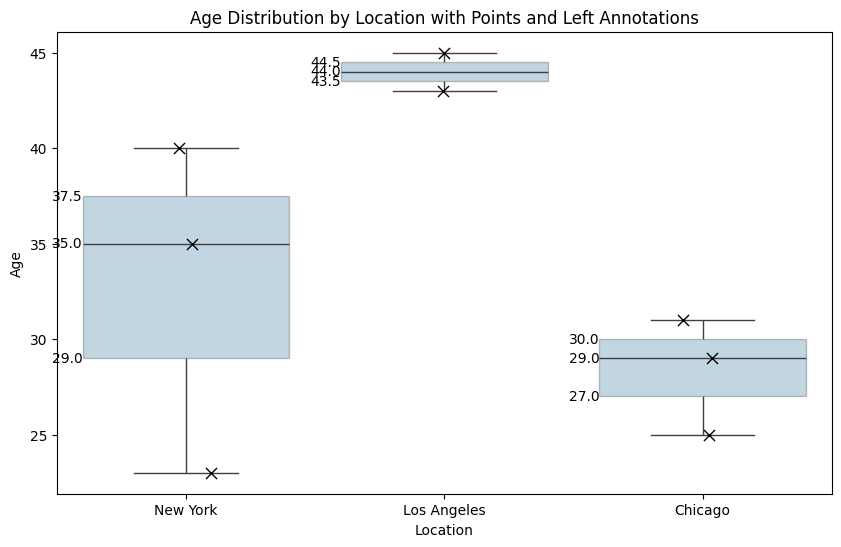

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {
    'location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],
    'age': [23, 45, 31, 35, 43, 25, 40, 29]
}
df = pd.DataFrame(data)

def plot_age_by_location_with_left_annotations(df):
    """
    Show a box plot comparing the distribution of age by location with individual points overlaid
    and annotations for the quartile values on the left side of each box.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    
    # Create the boxplot
    ax = sns.boxplot(x='location', y='age', data=df, showfliers=False, boxprops={'alpha': 0.3})
    
    # Overlay the individual data points
    sns.stripplot(x='location', y='age', data=df, jitter=True, marker='x', color='black', size=8, linewidth=1)
    
    # Adding titles and labels
    plt.title('Age Distribution by Location with Points and Left Annotations')
    plt.xlabel('Location')
    plt.ylabel('Age')
    
    # Annotate the boxplot with quartile values on the left side of the box
    for i, location in enumerate(df['location'].unique()):
        quartiles = df[df['location'] == location]['age'].quantile([0.25, 0.5, 0.75])
        # 25th percentile
        ax.text(i - 0.4, quartiles[0.25], f'{quartiles[0.25]:.1f}', ha='right', va='center', color='black', fontsize=10)
        # Median (50th percentile)
        ax.text(i - 0.4, quartiles[0.5], f'{quartiles[0.5]:.1f}', ha='right', va='center', color='black', fontsize=10)
        # 75th percentile
        ax.text(i - 0.4, quartiles[0.75], f'{quartiles[0.75]:.1f}', ha='right', va='center', color='black', fontsize=10)
    
    # Display the plot
    plt.show()

# Plot the boxplot with points and left annotations
plot_age_by_location_with_left_annotations(df)


## Multiple Variables

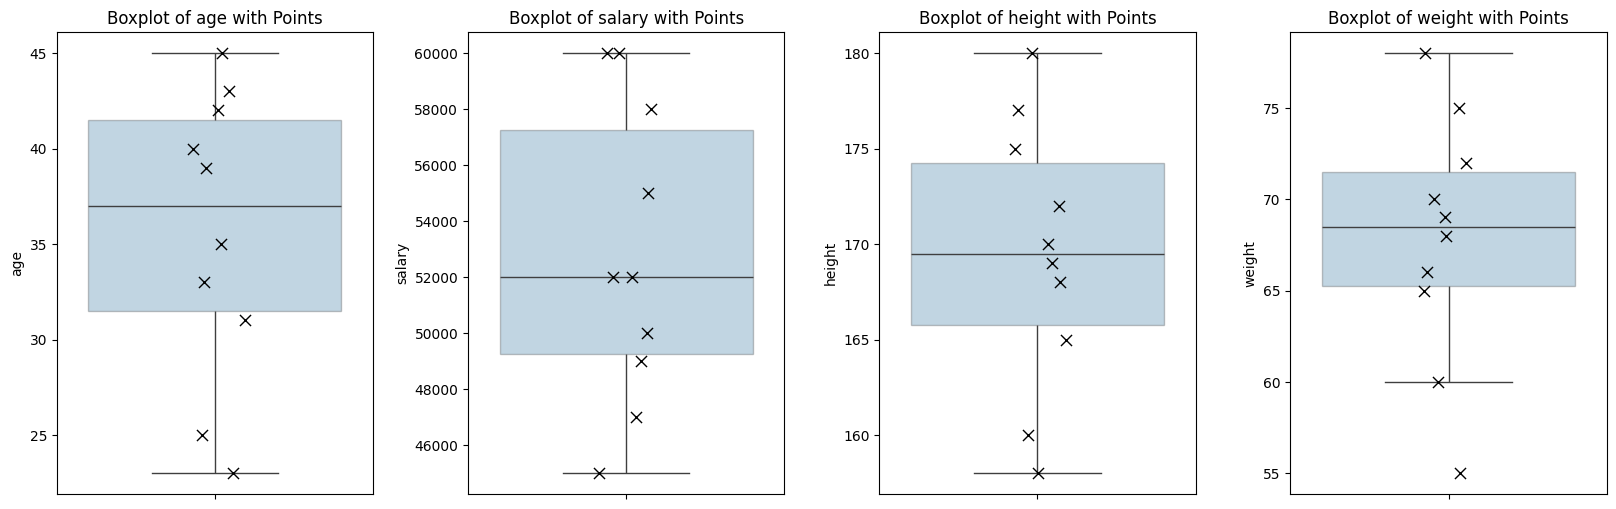

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def show_boxplots_with_points(df, columns):
    """
    Show boxplots of four variables in a DataFrame side by side with overlaid data points as crosses.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names of the variables to visualize.

    Returns:
    None
    """
    # Set up the GridSpec layout
    fig = plt.figure(figsize=(20, 6))
    gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 1], wspace=0.3)
    
    # Iterate over the columns and create a subplot for each
    for i, column in enumerate(columns):
        ax = fig.add_subplot(gs[i])
        sns.boxplot(y=df[column], orient='v', ax=ax, showfliers=False, boxprops={'alpha': 0.3})
        sns.stripplot(y=df[column], jitter=True, marker='x', color='black', size=8, linewidth=1, ax=ax)
        ax.set_title(f'Boxplot of {column} with Points')
    
    # Display the plots
    plt.show()

# Example usage
import pandas as pd

# Example DataFrame
data = {
    'age': [23, 45, 31, 35, 43, 25, 40, 42, 33, 39],
    'salary': [50000, 60000, 45000, 52000, 58000, 47000, 55000, 60000, 49000, 52000],
    'height': [165, 170, 175, 160, 180, 158, 172, 169, 177, 168],
    'weight': [55, 78, 68, 72, 70, 60, 65, 75, 69, 66]
}
df = pd.DataFrame(data)

# Show boxplots with all points as crosses for 'age', 'salary', 'height', and 'weight'
show_boxplots_with_points(df, ['age', 'salary', 'height', 'weight'])


## Show the quantile

In [10]:
import pandas as pd

# Example DataFrame
data = {
    'location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],
    'age': [23, 45, 31, 35, 43, 25, 40, 29]
}
df = pd.DataFrame(data)

def calculate_percentiles_with_counts(df, column):
    """
    Calculate and display a table showing the distribution of a column by percentiles
    and how many data points are in each percentile range.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name for which to calculate percentiles.

    Returns:
    pd.DataFrame: DataFrame with calculated percentiles and counts.
    """
    # Define the percentiles
    percentiles = [i for i in range(10, 101, 10)]
    
    # Calculate the percentile thresholds
    quantiles = df[column].quantile([p / 100 for p in percentiles])
    
    # Determine the number of people in each percentile range
    counts = pd.cut(df[column], bins=[-float('inf')] + quantiles.tolist(), include_lowest=True).value_counts(sort=False)
    
    # Create a DataFrame to display
    percentile_table = pd.DataFrame({
        'Percentile': [f'{p}th' for p in percentiles],
        'Age': quantiles.values,
        'Count': counts.values
    })
    
    return percentile_table

# Calculate and display the percentiles for age with counts
percentile_table = calculate_percentiles_with_counts(df, 'age')

# Display the table
percentile_table


,Percentile,Age,Count
0,10th,24.4,1
1,20th,26.6,1
2,30th,29.2,1
3,40th,30.6,0
4,50th,33.0,1
5,60th,36.0,1
6,70th,39.5,0
7,80th,41.8,1
8,90th,43.6,1
9,100th,45.0,1


## Quartile

In [11]:
import pandas as pd

# Example DataFrame
data = {
    'location': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],
    'age': [23, 45, 31, 35, 43, 25, 40, 29]
}
df = pd.DataFrame(data)

def calculate_quartiles_with_counts(df, column):
    """
    Calculate and display a table showing the distribution of a column by quartiles
    and how many data points are in each quartile range.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name for which to calculate quartiles.

    Returns:
    pd.DataFrame: DataFrame with calculated quartiles and counts.
    """
    # Define the quartiles
    quartiles = [25, 50, 75, 100]
    
    # Calculate the quartile thresholds
    quantiles = df[column].quantile([q / 100 for q in quartiles])
    
    # Determine the number of people in each quartile range
    counts = pd.cut(df[column], bins=[-float('inf')] + quantiles.tolist(), include_lowest=True).value_counts(sort=False)
    
    # Create a DataFrame to display
    quartile_table = pd.DataFrame({
        'Quartile': [f'{q}th' for q in quartiles],
        'Age': quantiles.values,
        'Count': counts.values
    })
    
    return quartile_table

# Calculate and display the quartiles for age with counts
quartile_table = calculate_quartiles_with_counts(df, 'age')

# Display the table
quartile_table


,Quartile,Age,Count
0,25th,28.00,2
1,50th,33.00,2
2,75th,40.75,2
3,100th,45.00,2


## Yes or No Question

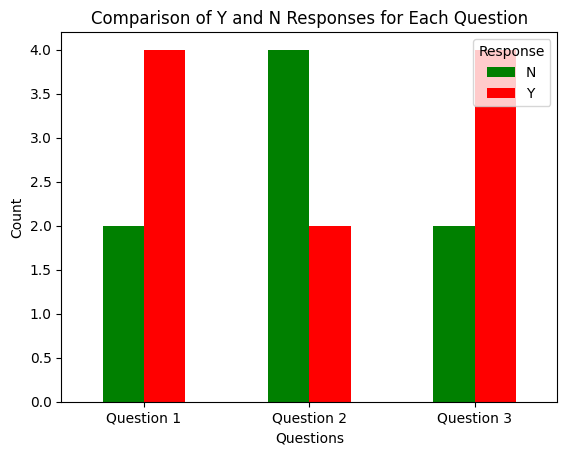

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_yes_no_distribution(df, questions):
    """
    Plot a bar graph to compare the number of 'Y' and 'N' responses for each question.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    questions (list of str): List of column names representing the questions.

    Returns:
    None
    """
    # Count the number of 'Y' and 'N' for each question
    counts = df[questions].apply(lambda x: x.value_counts()).fillna(0)
    
    # Plot the bar graph
    counts.T.plot(kind='bar', stacked=False, color=['green', 'red'])
    
    plt.title('Comparison of Y and N Responses for Each Question')
    plt.ylabel('Count')
    plt.xlabel('Questions')
    plt.xticks(rotation=0)  # Rotate x labels for better readability
    plt.legend(title='Response')
    plt.show()

# Example usage
data = {
    'Question 1': ['Y', 'N', 'Y', 'Y', 'N', 'Y'],
    'Question 2': ['N', 'N', 'Y', 'N', 'Y', 'N'],
    'Question 3': ['Y', 'Y', 'N', 'N', 'Y', 'Y']
}
df = pd.DataFrame(data)

# Plot the distribution of 'Y' and 'N' for each question
plot_yes_no_distribution(df, ['Question 1', 'Question 2', 'Question 3'])


## Useful Functions

Change NaN to string

In [4]:
df = df.fillna('N')